Error processing file 107-1.png: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Error processing file 107-2.png: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Error processing file 107-3.png: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color chan

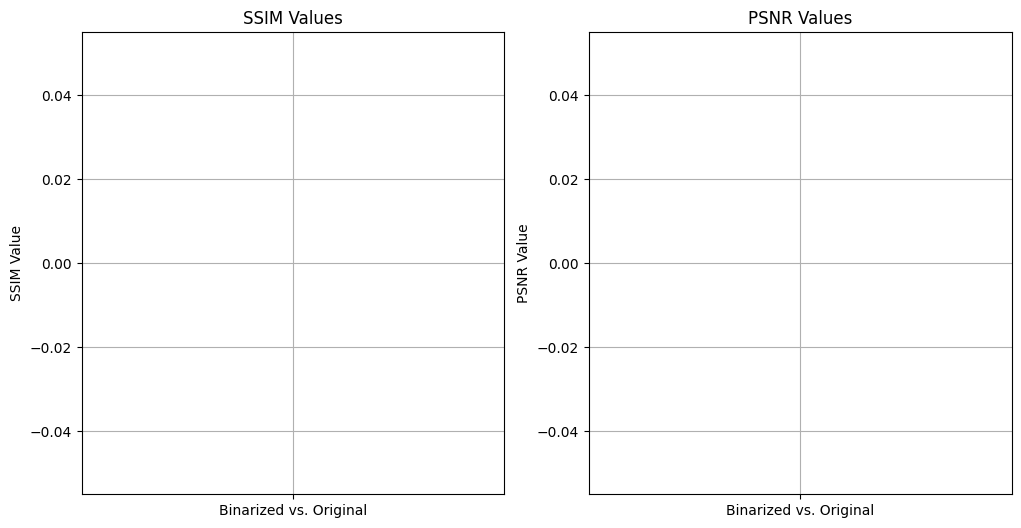

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def analyze_and_plot(clean_image_path, dirty_image_path):
    ssim_values = []
    psnr_values = []

    for file in os.listdir(clean_image_path):
        clean_image_full_path = os.path.join(clean_image_path, file)
        dirty_image_full_path = os.path.join(dirty_image_path, file)
        
        if not os.path.exists(clean_image_full_path):
            print(f"Clean image file does not exist: {clean_image_full_path}")
            continue
        
        if not os.path.exists(dirty_image_full_path):
            print(f"Dirty image file does not exist: {dirty_image_full_path}")
            continue

        try:
            clean_image = np.array(Image.open(clean_image_full_path).convert("RGB"))
            dirty_image = np.array(Image.open(dirty_image_full_path).convert("RGB"))

            # Resize images to the same size if they are different
            if clean_image.shape != dirty_image.shape:
                dirty_image = np.array(Image.open(dirty_image_full_path).convert("RGB").resize(clean_image.shape[1::-1]))

            # Calculate SSIM
            ssim_value = ssim(clean_image, dirty_image, multichannel=True)
            ssim_values.append(ssim_value)
            print(f"SSIM value for {file}: {ssim_value}")

            # Calculate PSNR
            psnr_value = psnr(clean_image, dirty_image)
            psnr_values.append(psnr_value)
            print(f"PSNR value for {file}: {psnr_value}")
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    
    # Boxplots erstellen
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].boxplot(ssim_values, vert=True, patch_artist=True)
    axes[0].set_title('SSIM Values')
    axes[0].set_ylabel('SSIM Value')
    axes[0].set_xticks([1])
    axes[0].set_xticklabels(['Binarized vs. Original'])
    axes[0].grid(True)
    
    axes[1].boxplot(psnr_values, vert=True, patch_artist=True)
    axes[1].set_title('PSNR Values')
    axes[1].set_ylabel('PSNR Value')
    axes[1].set_xticks([1])
    axes[1].set_xticklabels(['Binarized vs. Original'])
    axes[1].grid(True)

    plt.show()

# Pfade zu den Bildverzeichnissen
clean_image_path = r'/home/vincent/Simularity_evaluate/Binarized/'
dirty_image_path = r'/home/vincent/Simularity_evaluate/Original/'

analyze_and_plot(clean_image_path, dirty_image_path)

